In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Bupa\Bupa_NG_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6
0,85.0,92.0,45,27,31.0,0.0
1,85.0,NaN,59,32,23.0,0.0
2,86.0,54.0,33,16,54.0,0.0
3,91.0,78.0,34,24,NaN,0.0
4,98.0,55.0,13,17,NaN,0.0
...,...,...,...,...,...,...
340,91.0,54.0,25,22,35.0,4.0
341,89.0,48.0,32,22,14.0,4.0
342,85.0,NaN,22,23,34.0,4.0
343,95.0,93.0,21,27,47.0,6.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	34
float64		column 2	18
int64		column 3	0
int64		column 4	0
float64		column 5	51
float64		column 6	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6
count,311.000000,327.000000,345.000000,345.000000,294.000000,345.000000
mean,89.938907,69.923547,30.405797,24.643478,37.588435,3.455072
std,4.282688,18.437849,19.512309,10.064494,38.539426,3.337835
min,65.000000,23.000000,4.000000,5.000000,5.000000,0.000000
25%,87.000000,57.000000,19.000000,19.000000,15.000000,0.500000
50%,90.000000,67.000000,26.000000,23.000000,25.500000,3.000000
75%,92.000000,80.000000,34.000000,27.000000,42.750000,6.000000
max,102.000000,138.000000,155.000000,82.000000,297.000000,20.000000


<AxesSubplot:>

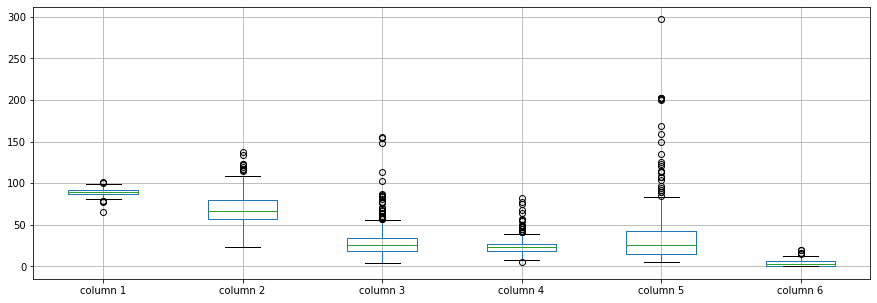

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    89.938907
column 2    69.923547
column 3    30.405797
column 4    24.643478
column 5    37.588435
column 6     3.455072
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6
column 1,1.000000,0.025068,0.133782,0.175617,0.219284,0.347845
column 2,0.025068,1.000000,0.080145,0.151739,0.119696,0.100758
column 3,0.133782,0.080145,1.000000,0.739675,0.549170,0.206848
column 4,0.175617,0.151739,0.739675,1.000000,0.561396,0.279588
column 5,0.219284,0.119696,0.549170,0.561396,1.000000,0.336780
column 6,0.347845,0.100758,0.206848,0.279588,0.336780,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [6,6+36,6+36+36,6+36+36+36,6+36+36+36+36,6+36+36+36,6+36+36,6+36,6], vae_layer = False, seed = 360)
imputer.build_model(df)
imputer.train_model(training_epochs=36)


Size index: [6]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 258.5534188406808
Epoch: 1 , loss: 260.40280078706286
Epoch: 2 , loss: 259.09908694312685
Epoch: 3 , loss: 259.1370282854353
Epoch: 4 , loss: 259.2820739746094
Epoch: 5 , loss: 260.13398887997585
Epoch: 6 , loss: 258.5063200451079
Epoch: 7 , loss: 259.6446097237723
Epoch: 8 , loss: 258.77925182524183
Epoch: 9 , loss: 259.69471522739957
Epoch: 10 , loss: 261.06895664760043
Epoch: 11 , loss: 259.8213820684524
Epoch: 12 , loss: 258.3873668852307
Epoch: 13 , loss: 257.20008268810454
Epoch: 14 , loss: 260.1772242954799
Epoch: 15 , loss: 257.36414228166853
Epoch: 16 , loss: 257.0178745814732
Epoch: 17 , loss: 258.2715301513672
Epoch: 18 , loss: 258.41243634905135
Epoch: 19 , loss: 257.9623325892857
Epoch: 20 , loss: 256.7657710484096
Epoch: 21 , loss: 254.3758029029483
Epoch: 22 , loss: 248.81854030064173
Epoch: 23 , loss: 238.89269002278647
Epoch: 24 , loss: 230.31874229794457
Epoch: 25 , loss: 212.558368501

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(345, 6)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    90.0
column 2    47.0
column 3    28.0
column 4    15.0
column 5    18.0
column 6     0.5
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Bupa.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6
0,0.0,0.000000,0,0,0.000000,0.0
1,0.0,-38.788202,0,0,0.000000,0.0
2,0.0,0.000000,0,0,0.000000,0.0
3,0.0,0.000000,0,0,-26.431115,0.0
4,0.0,0.000000,0,0,-3.458540,0.0
...,...,...,...,...,...,...
340,0.0,0.000000,0,0,0.000000,0.0
341,0.0,0.000000,0,0,0.000000,0.0
342,0.0,-22.368402,0,0,0.000000,0.0
343,0.0,0.000000,0,0,0.000000,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

565.931140167486

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

2519.762091944396

In [18]:
NRMS=numerator/denominator
NRMS


0.2245970530220892

In [19]:
new_df.iloc[66,:]

column 1    86.0
column 2    54.0
column 3    20.0
column 4    21.0
column 5    16.0
column 6     2.0
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6
0,85.0,92.000000,45,27,31.000000,0.0
1,85.0,25.211798,59,32,23.000000,0.0
2,86.0,54.000000,33,16,54.000000,0.0
3,91.0,78.000000,34,24,9.568885,0.0
4,98.0,55.000000,13,17,13.541460,0.0
...,...,...,...,...,...,...
340,91.0,54.000000,25,22,35.000000,4.0
341,89.0,48.000000,32,22,14.000000,4.0
342,85.0,29.631598,22,23,34.000000,4.0
343,95.0,93.000000,21,27,47.000000,6.0


In [21]:
imputations[-1].to_excel("Bupa_NG_5(imp).xlsx", index=False, header=False)